In [1]:
# Add description here
#
# *Note:* You can open this file as a notebook (JupyterLab: right-click on it in the side bar -> Open With -> Notebook)

In [2]:
# Uncomment the next two lines to enable auto reloading for imported modules
# %load_ext autoreload
# %autoreload 2
# For more info, see:
# https://docs.ploomber.io/en/latest/user-guide/faq_index.html#auto-reloading-code-in-jupyter

In [3]:
# If this task has dependencies, list them them here
# (e.g. upstream = ['some_task']), otherwise leave as None.
upstream = ['05-split']

# This is a placeholder, leave it as None
product = None

In [4]:
# Parameters
upstream = {"05-split": {"nb": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/products/05-split.ipynb", "train_data": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/house_prices_train.csv", "test_data": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/house_prices_test.csv"}}
product = {"nb": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/products/06-linear_regression.ipynb", "model_file": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/linear_regression.pickle"}


In [5]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
train_data = pd.read_csv(upstream['05-split']['train_data'])
test_data = pd.read_csv(upstream['05-split']['test_data'])

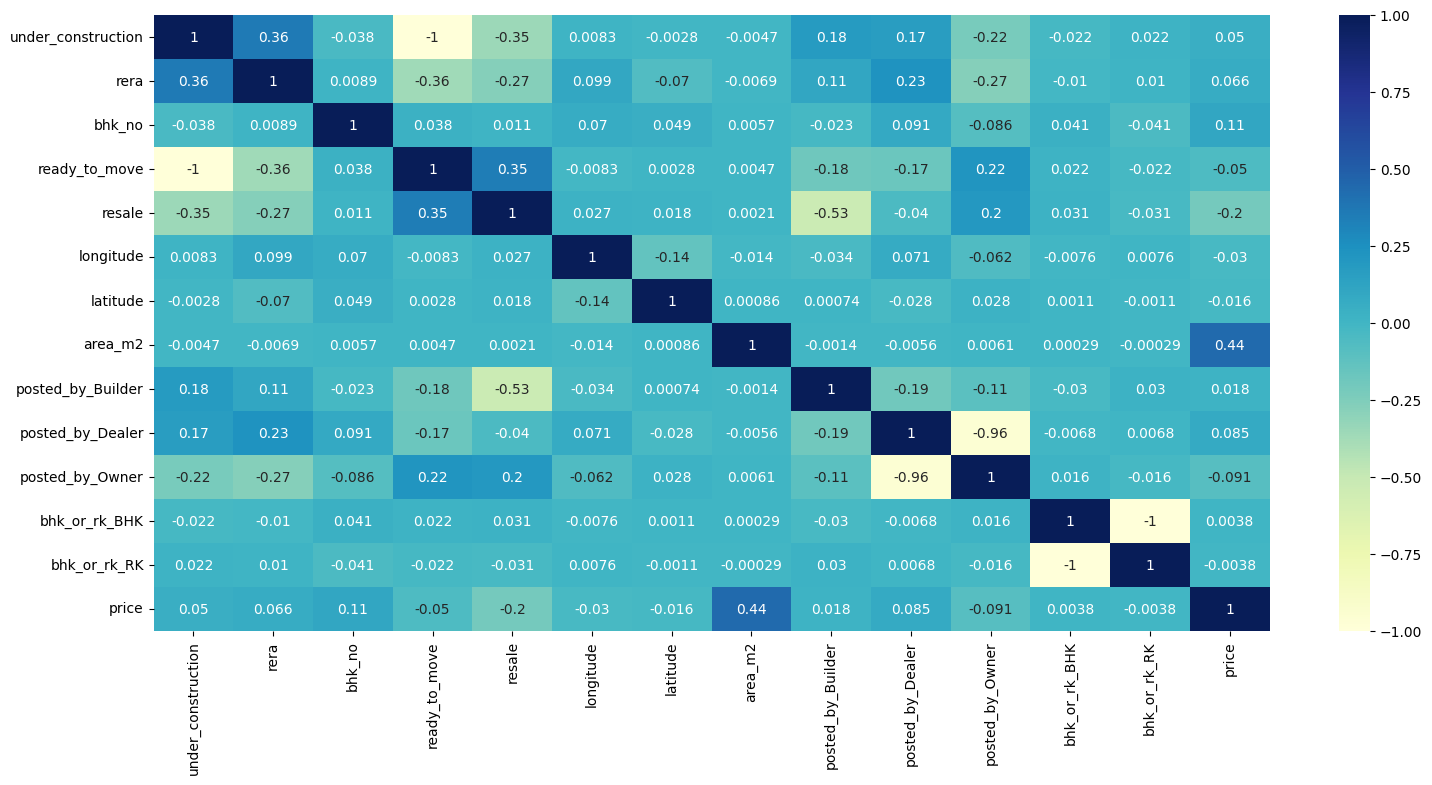

In [7]:
# Correlation on train data
plt.figure(figsize=(18, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [8]:
# Columns to drop for a linear refression
columns_to_drop = ['bhk_or_rk_BHK', 'bhk_or_rk_RK', 'latitude', 'longitude']
train_data = train_data.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)

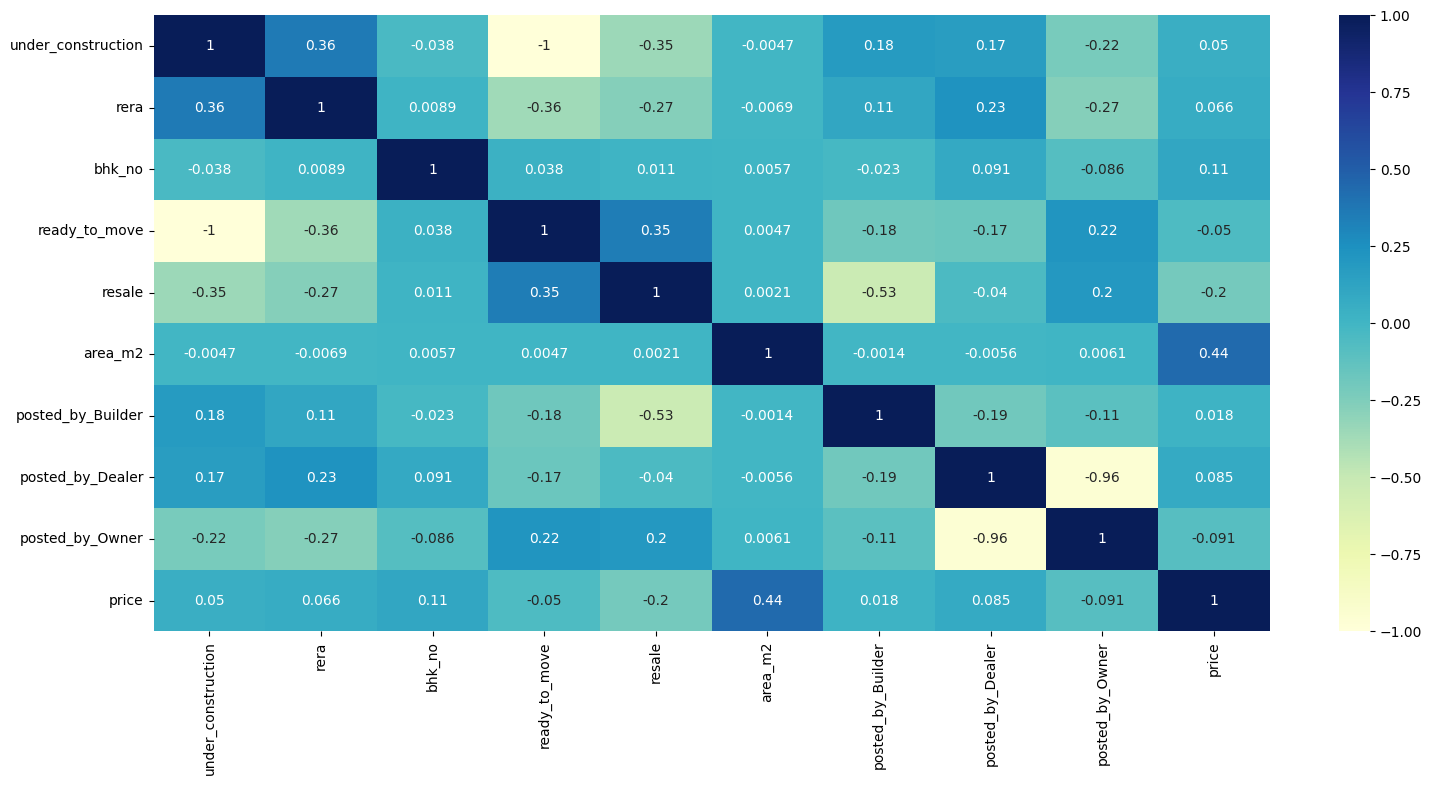

In [9]:
# Correlation on train data
plt.figure(figsize=(18, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [10]:
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price']

In [11]:
X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price']

In [12]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
score = linear_reg.score(X_test, y_test)

print(f'R2 Score {score}')

R2 Score 0.07773716744188053


In [14]:
#--Evaluation metrics for regression models
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
y_pred = linear_reg.predict(X_test)
r2_linear = r2_score(y_test,y_pred)

print(f'{r2_linear:=}')

0.07773716744188053


In [15]:
model_file = Path(product['model_file'])
with open(model_file, 'wb') as f:
    pickle.dump(product['model_file'], f)

print(f'Model file: {model_file} exists: {model_file.exists()}')

Model file: /home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/linear_regression.pickle exists: True
